# Introduction to AR and MA models

## Time series models

* aim to capture complex temporal dependence
* build by combining processes with simple dependence structure - __innovations__

### Innovations

$$ \boldsymbol \varepsilon = \{ \varepsilon_t \}, ~~~~ \operatorname{E} (\varepsilon_t) = 0, ~~~~ \operatorname{var} (\varepsilon_t) = \sigma^2$$

* white noise
* martingale difference
* iid

### Linear time series models

* The time series $\mathbf{z}$ and the innovation $\boldsymbol \varepsilon$ are linearly related

$$
\boldsymbol z = \boldsymbol A \boldsymbol \varepsilon
$$

* or more generally, the transformation $\boldsymbol \varepsilon \rightarrow \mathbf{z}$ is affine

$$
\boldsymbol z = \boldsymbol \mu + \boldsymbol A \boldsymbol \varepsilon
$$

* with Gaussian innovations $p(\boldsymbol \varepsilon)  \sim \mathcal{N}(\boldsymbol 0, \sigma^2\mathbf{I})$

$$
\boldsymbol z = \boldsymbol \mu + \boldsymbol A \boldsymbol \varepsilon \sim \mathcal{N}(\boldsymbol \mu, \mathbf{\Sigma}),
\;\;\;\; \mathbf{\Sigma} = \sigma^2 \boldsymbol A \boldsymbol A'$$

## Moving Average (MA) models

$$ z_t = \sum_{i=0}^{q} \theta_i \varepsilon_{t-i} $$

### MA(1)

$$
z_{t} = \varepsilon_{t} + \theta  \varepsilon_{t-1} 
$$

$$
\begin{align}
z_{1} &= \theta \varepsilon_{0} + \varepsilon_{1} \\
z_{2} &= \theta \varepsilon_{1} + \varepsilon_{2} \\
  &\vdots \\
z_{T} &= \theta \varepsilon_{T-1} + \varepsilon_{T}
\end{align}
$$

$$
\underset{\mathbf{z}}{\underbrace{\left[\begin{array}{c}
z_{1}\\
z_{2}\\
z_{3}\\
z_{4}\\
\vdots\\
z_{T}
\end{array}\right]}}
=
\underset{\boldsymbol A}{\underbrace{\left[\begin{array}{cccccccc}
\theta & 1 & 0 & 0 & \cdots & 0 & 0 & 0\\
0 & \theta & 1 & 0 & \cdots & 0 & 0 & 0\\
0  & 0  & \theta & 1 & \cdots & 0 & 0 & 0\\
0 & 0 & 0 & \theta & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots\\
0  & 0  & 0 & 0 & \cdots & 0 & \theta & 1
\end{array}\right]}}
\underset{\boldsymbol\varepsilon}{\underbrace{
\left[\begin{array}{c}
\varepsilon_{0}\\
\varepsilon_{1}\\
\varepsilon_{2}\\
\varepsilon_{3}\\
\varepsilon_{4}\\
\vdots\\
\varepsilon_{T}
\end{array}\right]
}}
$$

### Stationarity conditions

* constant mean? 

$$\operatorname E z_t = 0 $$

* constant variance?

$$\gamma(0) = \sigma^2(1+\theta^2)$$

* constant covariances?

__for lag $h=1$__

$$
\begin{align}
\gamma(1) =\operatorname{cov}(z_t, z_{t-1}) &= \operatorname E (z_t z_{t-1}) = \operatorname E \left((\varepsilon_{t} + \theta  \varepsilon_{t-1} )(\varepsilon_{t-1} + \theta  \varepsilon_{t-2} )\right)\\
&= \operatorname E (\varepsilon_{t}\varepsilon_{t-1} + \theta  \varepsilon_{t-1}^2 + \theta  \varepsilon_{t}\varepsilon_{t-2} + \theta^2 \varepsilon_{t-1}\varepsilon_{t-2})\\
&=\theta \sigma^2
\end{align}
$$

__for lag $h\geq 2$__

$$
\begin{align}
\gamma(h) =\operatorname{cov}(z_t, z_{t-h}) &= \operatorname E \left((\varepsilon_{t} + \theta  \varepsilon_{t-1} )(\varepsilon_{t-h} + \theta  \varepsilon_{t-h-1} )\right)\\
&= 0
\end{align}
$$

In [1]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_process import arma_acovf
from scipy.linalg import toeplitz

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


plt.rcParams.update({'ytick.left' : True,
                     "xtick.bottom" : True,
                     "ytick.major.size": 0,
                     "ytick.major.width": 0,
                     "xtick.major.size": 0,
                     "xtick.major.width": 0,
                     "ytick.direction": 'in',
                     "xtick.direction": 'in',
                     'ytick.major.right': False,
                     'xtick.major.top': True,
                     'xtick.top': True,
                     'ytick.right': True,
                     'ytick.labelsize': 18,
                     'xtick.labelsize': 18
                    })

np.random.seed(12345)

def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation


def show_covariance(cov_mat, process_name):
    K = cov_mat.shape[0]
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,8))

    
    c = ax.imshow(cov_mat,
                       cmap="magma_r",
                      )
    
    #c = ax.pcolormesh(Sigma, edgecolors='k', linewidth=.01, cmap='inferno_r')
    #ax = plt.gca()
    #ax.set_aspect('equal')
    #ax.invert_yaxis()


    plt.colorbar(c);


    ax.set_xticks(range(0,K))
    ax.set_xticklabels(range(1, K+1));
    ax.set_yticks(range(0,K))
    ax.set_yticklabels(range(1, K+1));  
    ax.set_title(f'Covariance {process_name}', fontsize=24)

    plt.subplots_adjust(wspace=-0.7)

In [2]:
n_obs = 20
arparams = np.array([0])
maparams = np.array([.4])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
sigma2=np.array([1])

acov_ma1 = arma_acovf(ar=ar, ma=ma, nobs=n_obs, sigma2=sigma2)

Sigma_ma1 = toeplitz(acov_ma1)

corr_ma1 = correlation_from_covariance(Sigma_ma1)

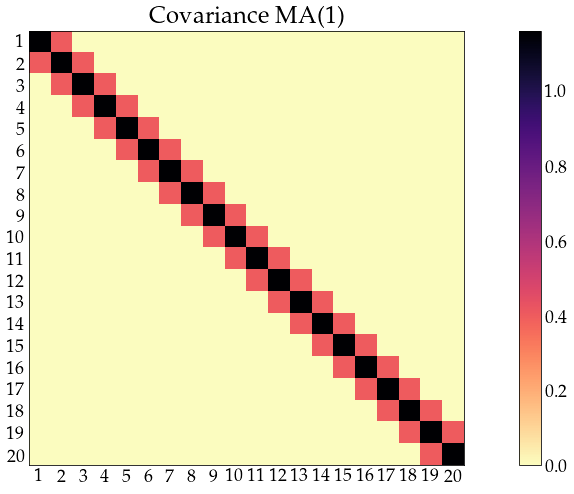

In [3]:
show_covariance(cov_mat=Sigma_ma1, process_name='MA(1)')

In [4]:
n_obs = 20
arparams = np.array([0])
maparams = np.array([.4, .2])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
sigma2=np.array([1])

acov_ma2 = arma_acovf(ar=ar, ma=ma, nobs=n_obs, sigma2=sigma2)

Sigma_ma2 = toeplitz(acov_ma2)

corr_ma2 = correlation_from_covariance(Sigma_ma2)

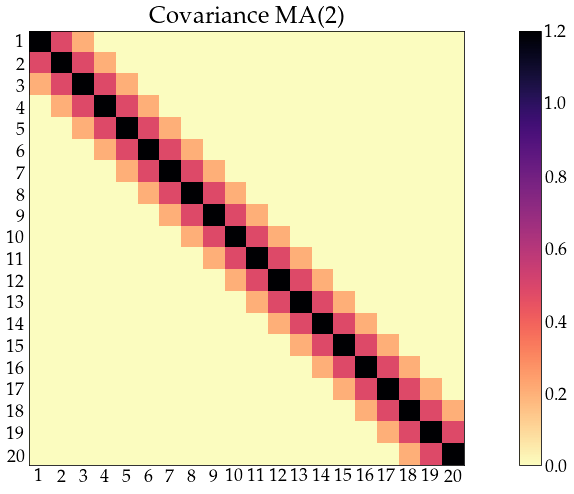

In [5]:
show_covariance(cov_mat=Sigma_ma2, process_name='MA(2)')

* need (at least) __MA(q)__ to have dependence between $z_t$ and $z_{t+q}$

$$ z_t = \varepsilon_t + \theta_1 \varepsilon_{t-1}+ \theta_2 \varepsilon_{t-2}+ \cdots + + \theta_q \varepsilon_{t-q}, \;\;\; \theta_q \neq 0$$

* not parsimonious ($q+1$ parameters to estimate)

## Autoregressive (AR) models

$$ z_t = \sum_{i=1}^{q} \alpha_i z_{t-1} + \varepsilon_{t} $$

### AR(1)

$$
z_{t} = \alpha z_{t-1} + \varepsilon_{t}
$$

$$
\begin{align}
z_{1} &= \alpha z_{0} + \varepsilon_{1} \\
z_{2} &= \alpha z_{1} + \varepsilon_{2} \\
      &= \alpha^2 z_{0} + \alpha \varepsilon_{1} + \varepsilon_{2} \\
  &\vdots \\
z_{T} &= \alpha^T z_{0} + \sum_{k=0}^{T-1} \alpha^{k} \varepsilon_{T-k} \\ 
\end{align}
$$

$$
\left[\begin{array}{c}
z_{1}\\
z_{2}\\
z_{3}\\
z_{4}\\
\vdots\\
z_{T}
\end{array}\right]
=
\left[\begin{array}{cccccccc}
\alpha & 1 & 0 & 0 & \cdots & 0 & 0 & 0\\
\alpha^2 & \alpha & 1 & 0 & \cdots & 0 & 0 & 0\\
\alpha^3  & \alpha^2  & \alpha & 1 & \cdots & 0 & 0 & 0\\
\alpha^4 & \alpha^3 & \alpha^2 & \alpha & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots\\
\alpha^T  & \alpha^{T-1}  & \alpha^{T-2} & \alpha^{T-3} & \cdots & \alpha^2 & \alpha & 1
\end{array}\right]
\left[\begin{array}{c}
z_{0}\\
\varepsilon_{1}\\
\varepsilon_{2}\\
\varepsilon_{3}\\
\vdots\\
\varepsilon_{T}
\end{array}\right]
$$


### initial values $z_0$

* known constant, e.g.  $z_0=0$
* unknown constant, to be estimated
* unknown random variable, independent from $\varepsilon_t$, e.g. $z_0 \sim \mathcal{N}(0, \sigma^2_0)$,  $\sigma_0$ to be estimated
* unknown random variable, independent from $\varepsilon_t$ e.g. $z_0 \sim \mathcal{N}(0, \frac{\sigma^2}{1-\alpha^2})$
    * equivalent to $z_0 = \frac{\varepsilon_0}{\sqrt{1-\alpha^2}}$, with $\varepsilon_0 \sim \mathcal{N}(0, \sigma^2)$
    
$$
\underset{\mathbf{z}}{\underbrace{\left[\begin{array}{c}
z_{1}\\
z_{2}\\
z_{3}\\
z_{4}\\
\vdots\\
z_{T}
\end{array}\right]}}
=
\underset{\boldsymbol A}{\underbrace{\left[\begin{array}{cccccccc}
\frac{\alpha}{\sqrt{1-\alpha^2}} & 1 & 0 & 0 & \cdots & 0 & 0 & 0\\
\frac{\alpha^2}{\sqrt{1-\alpha^2}} & \alpha & 1 & 0 & \cdots & 0 & 0 & 0\\
\frac{\alpha^3}{\sqrt{1-\alpha^2}} & \alpha^2  & \alpha & 1 & \cdots & 0 & 0 & 0\\
\frac{\alpha^4}{\sqrt{1-\alpha^2}} & \alpha^3 & \alpha^2 & \alpha & \cdots & 0 & 0 & 0\\
\vdots & \vdots & \vdots & \vdots & \cdots & \vdots & \vdots & \vdots\\
\frac{\alpha^T}{\sqrt{1-\alpha^2}} & \alpha^{T-1}  & \alpha^{T-2} & \alpha^{T-3} & \cdots & \alpha^2 & \alpha & 1
\end{array}\right]}}
\underset{\boldsymbol\varepsilon}{\underbrace{
\left[\begin{array}{c}
\varepsilon_{0}\\
\varepsilon_{1}\\
\varepsilon_{2}\\
\varepsilon_{3}\\
\vdots\\
\varepsilon_{T}
\end{array}\right]
}}
$$    

### Stationarity conditions

* constant variance ($\sigma^2_{z_t} = \sigma^2_{z_{t+k}} = \gamma(0) $):

$$\sigma^2_{z_t} = \alpha^2 \sigma^2_{z_{t-1}} + \sigma^2$$

$$\gamma(0) = \alpha^2 \gamma(0) + \sigma^2$$

since $\sigma^2 > 0$,  $\alpha \neq \pm 1$

$$ \gamma(0) = \frac{\sigma^2}{1-\alpha^2} $$

* constant mean ($\operatorname E z_t = \operatorname E z_{t+k} = \mu_{z} $)

$$
\begin{align}
\operatorname E z_t & = \alpha \operatorname E z_{t-1} + \operatorname E \varepsilon_t \\
                    & = \alpha \operatorname E z_{t-1}
\end{align}
$$

since $\alpha \neq 1$

$$\operatorname E z_t = \operatorname E z_{t-1} = \mu_{z} = 0 $$

* constant covariances ($\operatorname{cov}(z_t, z_{t+h}) = \operatorname E (z_t z_{t+h}) = \gamma(h)$)

$$
\begin{align}
z_{t+h} &= \alpha z_{t+h-1} + \varepsilon_{t+h}\\
&= \alpha^2 z_{t+h-2} + \alpha \varepsilon_{t+h-1} + \varepsilon_{t+h}\\
&\vdots \\
&=\alpha^h z_{t} + \alpha^{h-1} \varepsilon_{t+1} + \cdots + \alpha \varepsilon_{t+h-1} +\varepsilon_{t+h}
\end{align}
$$

$$
\begin{align}
\operatorname{cov}(z_t, z_{t+h}) &= \operatorname E (\alpha^h z_{t} z_{t}  + \alpha^{h-1} \varepsilon_{t+1} z_{t} + \cdots + \alpha \varepsilon_{t+h-1}z_{t} +\varepsilon_{t+h}z_{t})\\
 &=  \alpha^h \operatorname E (z_{t} z_{t} ) \\
 &=  \alpha^h \operatorname{var} (z_{t}) \\ 
 &= \alpha^h \frac{\sigma^2}{1-\alpha^2}
\end{align}
$$

* covariance __is__ time-invariant
*  correlation __is__ time-invariant

$$
\begin{align}
\operatorname{corr}(z_t, z_{t+h}) &= \frac{\operatorname{cov}(z_t, z_{t+h})}{\sqrt{\operatorname{var}(z_t){\operatorname{var}(z_t)}}} \\
 &= \alpha^{|h|}
\end{align}
$$

* (__stability condition__) for $\operatorname{corr}(z_t, z_{t+h}) \rightarrow 0$ as $h \rightarrow \infty$

$$| \alpha | < 1 $$

In [6]:
n_obs = 20
arparams = np.array([0.9])
maparams = np.array([0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
sigma2=np.array([1])

acov_ar1 = arma_acovf(ar=ar, ma=ma, nobs=n_obs, sigma2=sigma2)

Sigma_ar1 = toeplitz(acov_ar1)

corr_ar1 = correlation_from_covariance(Sigma_ar1)

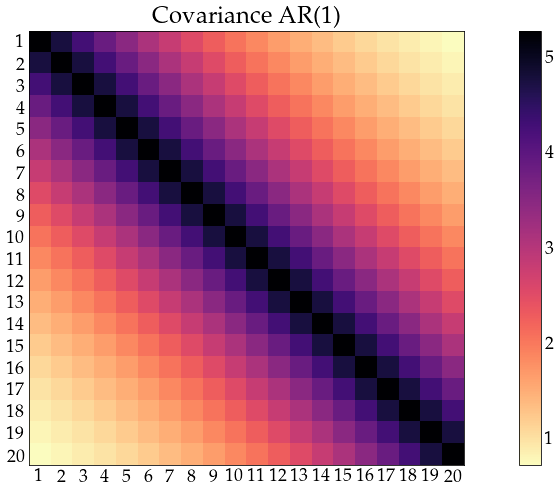

In [7]:
show_covariance(cov_mat=Sigma_ar1, process_name='AR(1)')

## MA and AR processes in Python

In [8]:
from statsmodels.tsa.arima_process import ArmaProcess

In [39]:
# create a MA(1) model
theta = np.array([.4])
ar = np.r_[1] # the coefficient on $z_t$
ma = np.r_[1, theta] 
ma1_process = ArmaProcess(ar, ma)

print(ma1_process)

ArmaProcess
AR: [1.0]
MA: [1.0, 0.4]


### autocovariances and autocorrelations (MA models)

In [40]:
ma1_process.acovf(3)

array([1.16, 0.4 , 0.  ])

In [41]:
#compare to analytical result
print([1*(1+theta**2), theta])

[array([1.16]), array([0.4])]


In [12]:
def plot_autocov(process, nlags, process_name):
    lags = np.arange(nlags+1)
    acovf_x = process.acovf(nlags+1)
    acf_x = process.acf(nlags+1)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    
    ax1.vlines(lags, [0], acovf_x, color='b')
    ax1.scatter(lags, acovf_x, marker='o', c='b')
    ax1.axhline(color='black', linewidth=.3)
    ax1.set_xticks(lags)
    ax1.set_xlabel('lags', fontsize=16)
    ax1.set_ylabel('ACOVF', fontsize=16)
    ax1.set_title(f'Theoretical autocovariances {process_name}', fontsize=20)
    

    ax2.vlines(lags, [0], acf_x, color='b')
    ax2.scatter(lags, acf_x, marker='o', c='b')
    ax2.axhline(color='black', linewidth=.3)
    ax2.set_xticks(lags)
    ax2.set_xlabel('lags', fontsize=16)
    ax2.set_ylabel('ACF', fontsize=16)
    ax2.set_title(f'Theoretical autocorrelations {process_name}', fontsize=18)

def plot_sample(z, process_name):

    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(z, c='black')
    ax.set_xlabel('time', fontsize=16)
    ax.set_title(f'{process_name}', fontsize=18)

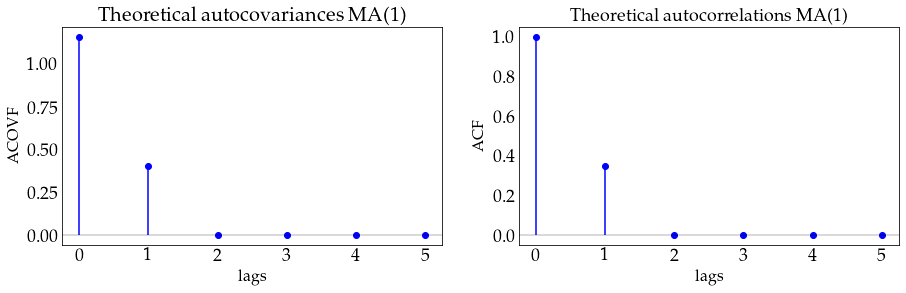

In [13]:
plot_autocov(process=ma1_process, nlags=5, process_name='MA(1)')

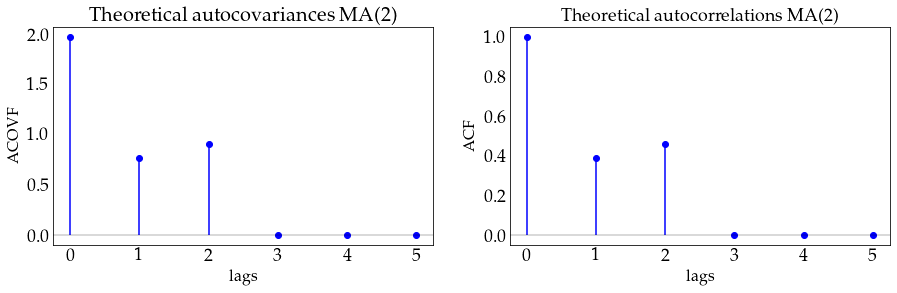

In [14]:
# define a MA(2) model

theta = np.array([.4, .9])
ar = np.r_[1] # the coefficient on $z_t$
ma = np.r_[1, theta] 
ma2_process = ArmaProcess(ar, ma)
plot_autocov(process=ma2_process, nlags=5, process_name='MA(2)')

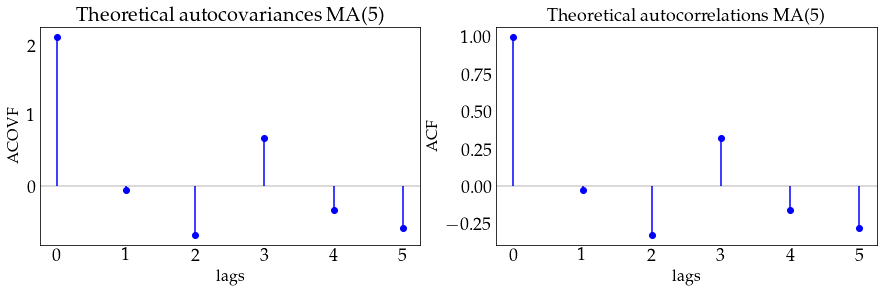

In [15]:
# define a MA(5) model
theta = np.array([.4, -.7, .3, -.1, -.6])
ar = np.r_[1] # the coefficient on $z_t$
ma = np.r_[1, theta] 
ma5_process = ArmaProcess(ar, ma)
plot_autocov(process=ma5_process, nlags=5, process_name='MA(5)')

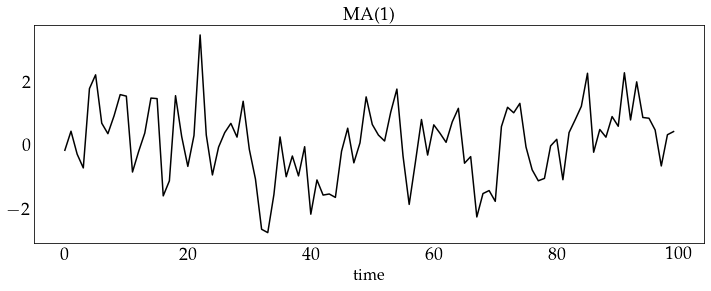

In [16]:
# generate a sample from the MA(1) model and plot it
z_ma1 = ma1_process.generate_sample(100)
plot_sample(z_ma1, process_name='MA(1)')

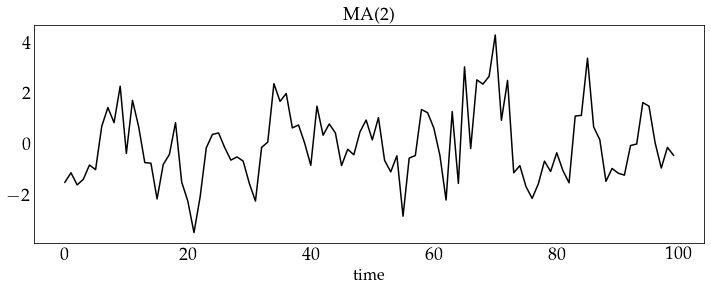

In [17]:
# generate a sample from the MA(2) model and plot it
z_ma2 = ma2_process.generate_sample(100)
plot_sample(z_ma2, process_name='MA(2)')

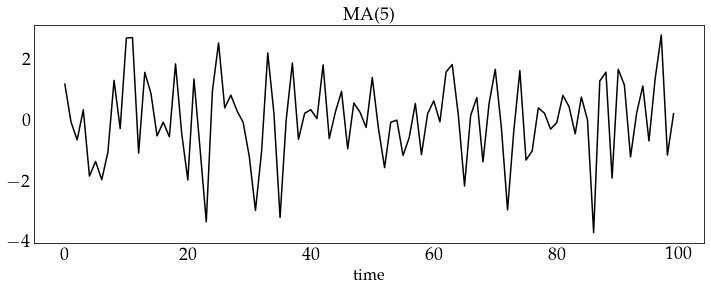

In [18]:
# generate a sample from the MA(5) model and plot it
z_ma5 = ma5_process.generate_sample(100)
plot_sample(z_ma5, process_name='MA(5)')

### autocovariances and autocorrelations (AR models)

In [19]:
alpha = .8 # coefficient on z(t-1)
ar = np.r_[1, -alpha] 
ma = np.r_[1] # coefficient on e(t)
ar1_process = ArmaProcess(ar, ma)

print(ar1_process)

ArmaProcess
AR: [1.0, -0.8]
MA: [1.0]


In [20]:
ar1_process.acovf(3)

array([2.77777778, 2.22222222, 1.77777778])

In [21]:
#compare to analytical result
sigma=1
print([sigma**2 / (1-alpha**2), \
       alpha*sigma**2/(1-alpha**2), \
       alpha**2*sigma**2/(1-alpha**2)
      ])

[2.7777777777777786, 2.222222222222223, 1.7777777777777788]


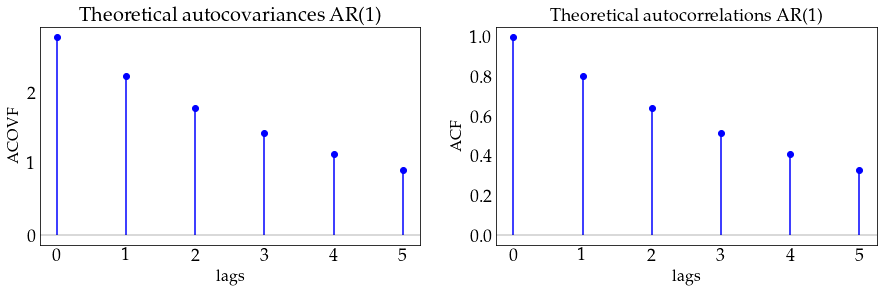

In [22]:
plot_autocov(process=ar1_process, nlags=5, process_name='AR(1)')

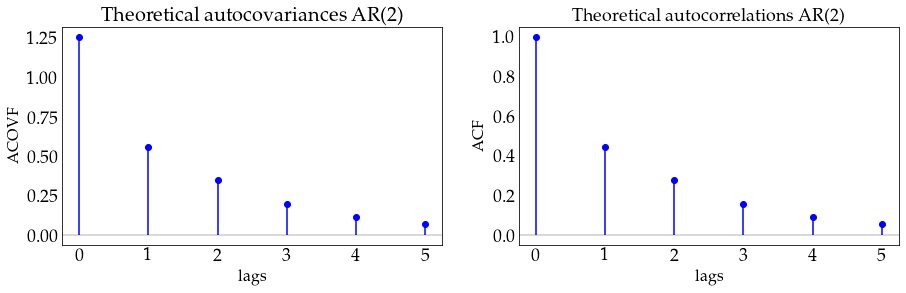

In [23]:
alpha = np.array([.4, .1]) 
ar = np.r_[1, -alpha] # the coefficient on $z_t$
ma = np.r_[1] 
ar2_process = ArmaProcess(ar, ma)
plot_autocov(process=ar2_process, nlags=5, process_name='AR(2)')

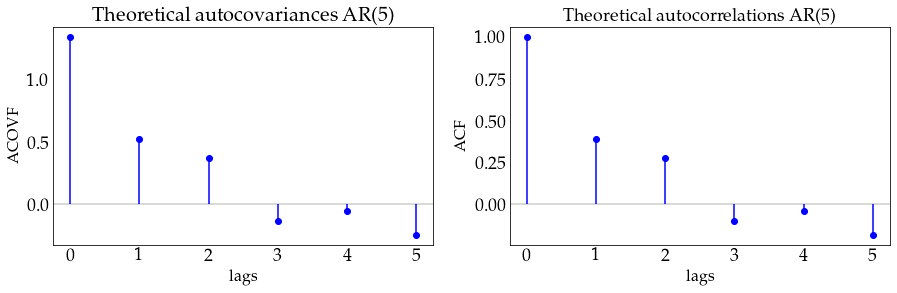

In [24]:
alpha = np.array([.4, .2, -.3, .1, -.1])
ar = np.r_[1, -alpha] # the coefficient on $z_t$
ma = np.r_[1] 
ar5_process = ArmaProcess(ar, ma)
plot_autocov(process=ar5_process, nlags=5, process_name='AR(5)')

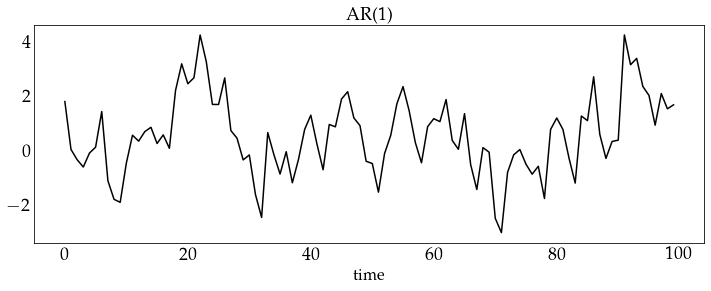

In [25]:
z_ar1 = ar1_process.generate_sample(100)
plot_sample(z_ar1, process_name='AR(1)')

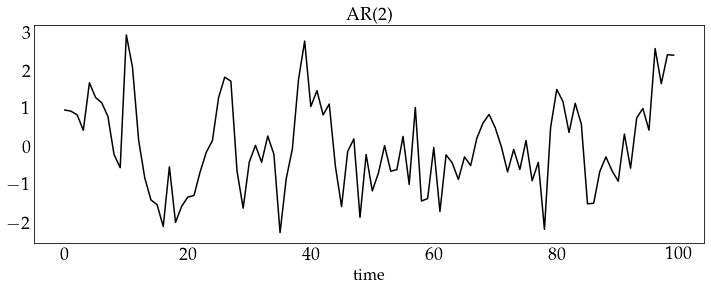

In [26]:
z_ar2 = ar2_process.generate_sample(100)
plot_sample(z_ar2, process_name='AR(2)')

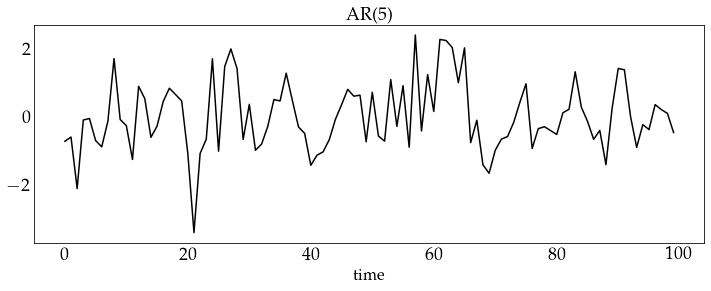

In [27]:
z_ar5 = ar5_process.generate_sample(100)
plot_sample(z_ar5, process_name='AR(5)')

## Non-zero mean

### MA(1)

$$
z_{t} = \mu + \varepsilon_{t} + \theta  \varepsilon_{t-1} 
$$

$$ \operatorname E (z_t) = \mu $$

### AR(1)

$$
z_{t} = \alpha_0 + \alpha_1 z_{t-1} + \varepsilon_{t}
$$

$$ \operatorname E (z_t) = \mu $$

$$
\begin{align}
\mu &= \alpha_0 + \alpha_1  \mu \\
&= \frac{\alpha_0}{1-\alpha_1}
\end{align}
$$

$$
z_{t} - \mu = \alpha_1 ( z_{t-1} - \mu) + \varepsilon_{t}
$$